In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

In [2]:
%matplotlib nbagg

In [4]:
def phase_calc(data, epoch, period):
    """
    Convert time array data in terms of phase, with a period, centered on epoch.
    :param data: time array in days (MJD)
    :param epoch: center of period, same unit like data array
    :param period: phase period in days
    :return: phase: array
    """

    phase1 = (data - epoch) / period     # the data point at time "epoch" will be the zero-point; convert int phase by division through period
    phase2 = np.floor(phase1)            # identify integer intervals of phase (where phase is between 0-1, between 1-2, between 2-3 and over 3)
    phase = phase1 - phase2              # make phase be in interval from 0 to 1
    toobig = np.where(phase > 0.5)[0]    # figure out where phase is bigger than 0.5
    if toobig.size > 0:
        phase[toobig] -= 1.0                 # and where it is bigger than 0.5 indeed, subtract one to get to interval [-0.5, 0.5]

    return phase

folded_binned = time_from_transit_centre, flux, residuals

models = time_from_transit_centre, transit_model

folded = time_from_transit_centre, flux, residuals


sector_binned = time_bkjd,flux,flux_detrended

models = time_bkjd, systematics_model_flux, transit_model_flux

sector = time_bkjd, flux, flux_detrended

In [7]:
sector_12 = pd.read_csv('sector_12.txt', sep=',')
sector_12_binned = pd.read_csv('sector_12_binned.txt', sep=',')
sector_12_models = pd.read_csv('sector_12_models.txt', sep=',')
sector_38 = pd.read_csv('sector_38.txt', sep=',')
sector_38_binned = pd.read_csv('sector_38_binned.txt', sep=',')
sector_38_models = pd.read_csv('sector_38_models.txt', sep=',')
folded_data = pd.read_csv('folded.txt', sep=',')
folded_binned = pd.read_csv('folded_binned.txt', sep=',')
folded_models = pd.read_csv('folded_models.txt', sep=',')

<IPython.core.display.Javascript object>


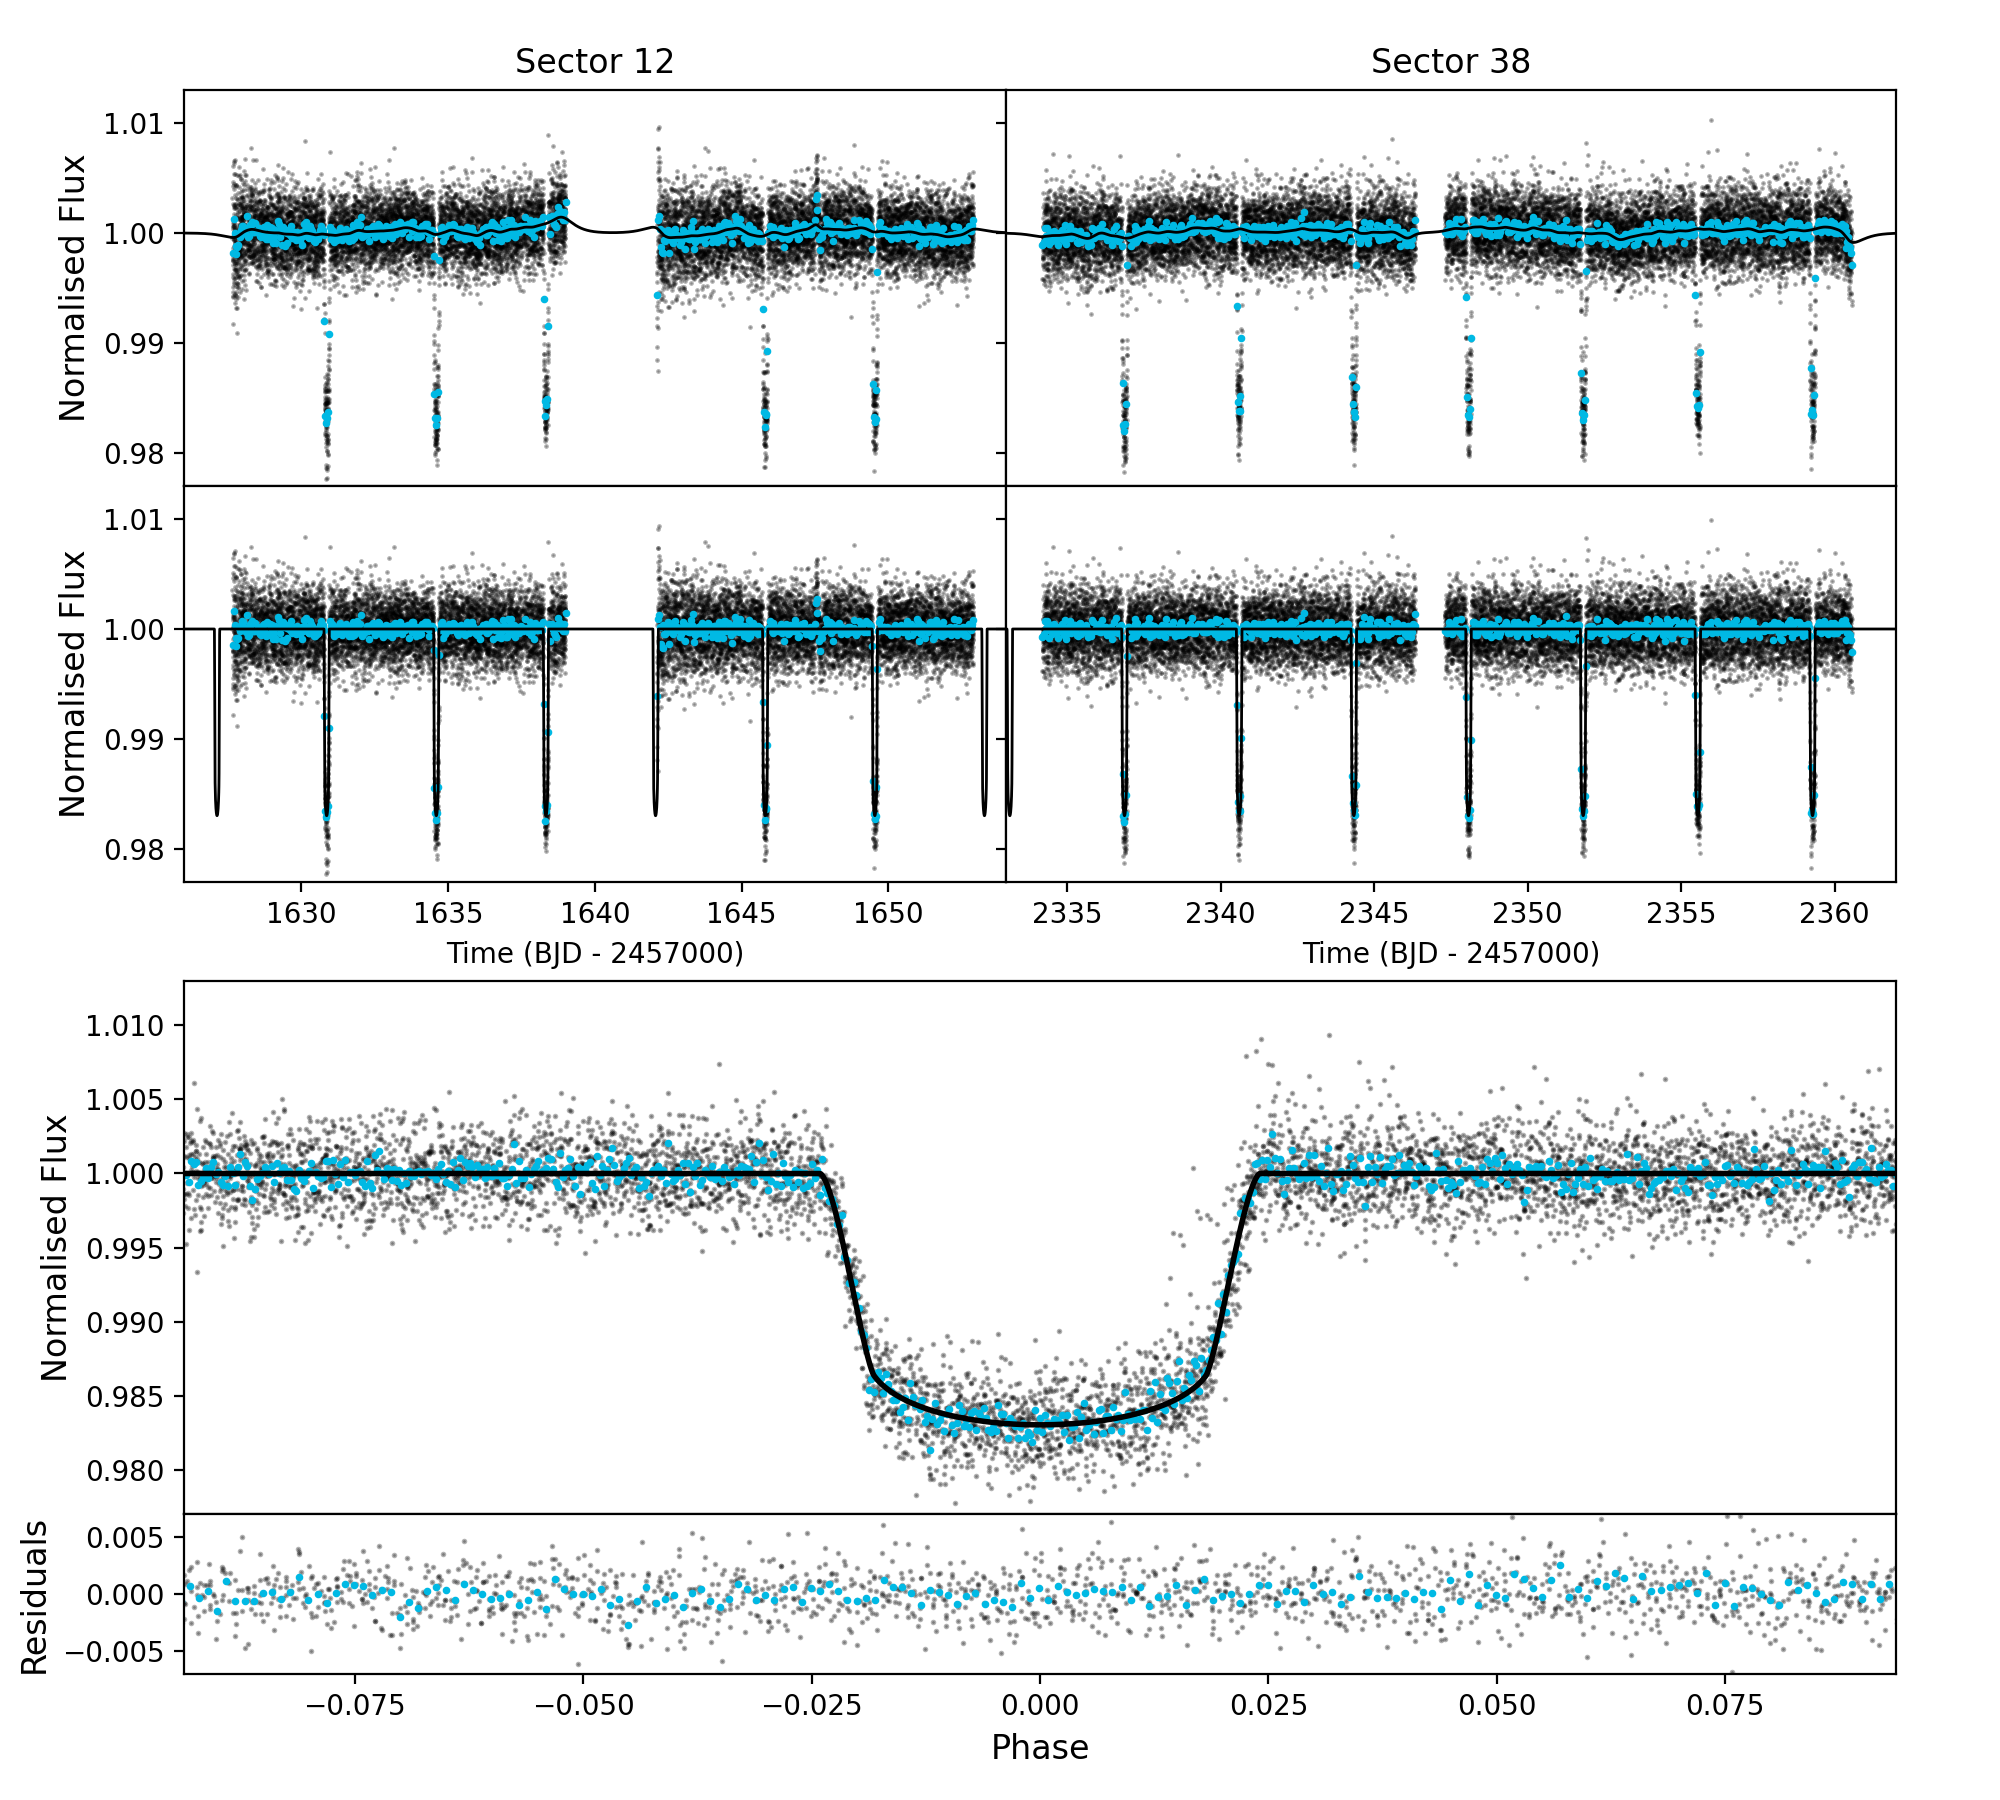

In [45]:
fig = plt.figure(figsize=(10, 9))
gs = fig.add_gridspec(16, 100)
ax1 = fig.add_subplot(gs[0:4, 0:48])
ax2 = fig.add_subplot(gs[0:4, 48:100])
ax3 = fig.add_subplot(gs[4:8, 0:48])
ax4 = fig.add_subplot(gs[4:8, 48:100])
ax5 = fig.add_subplot(gs[9:16, 0:100])

# Raw data.
ax1.scatter(sector_12['time_bkjd'], sector_12['flux'],
            color='#000000', alpha=0.3, s=0.5, zorder=1, rasterized=True)
ax2.scatter(sector_38['time_bkjd'], sector_38['flux'],
            color='#000000', alpha=0.3, s=0.5, zorder=1, rasterized=True)

# Raw data binned.
ax1.scatter(sector_12_binned['time_bkjd'], sector_12_binned['flux'],
            color='#00B9E4', alpha=1.0, s=3, zorder=1.5, rasterized=True)
ax2.scatter(sector_38_binned['time_bkjd'], sector_38_binned['flux'],
            color='#00B9E4', alpha=1.0, s=3, zorder=1.5, rasterized=True)

# Systematics model.
ax1.plot(sector_12_models['time_bkjd'], sector_12_models['systematics_model_flux'],
         color='#000000', alpha=1.0, lw=1, zorder=3, rasterized=True)
ax2.plot(sector_38_models['time_bkjd'], sector_38_models['systematics_model_flux'],
         color='#000000', alpha=1.0, lw=1, zorder=3, rasterized=True)

# De-trended data.
ax3.scatter(sector_12['time_bkjd'], sector_12['flux_detrended'],
            color='#000000', alpha=0.3, s=0.5, zorder=1, rasterized=True)
ax4.scatter(sector_38['time_bkjd'], sector_38['flux_detrended'],
            color='#000000', alpha=0.3, s=0.5, zorder=1, rasterized=True)

# De-trended and binned data.
ax3.scatter(sector_12_binned['time_bkjd'], sector_12_binned['flux_detrended'],
            color='#00B9E4', alpha=1.0, s=3, zorder=1.5, rasterized=True)
ax4.scatter(sector_38_binned['time_bkjd'], sector_38_binned['flux_detrended'],
            color='#00B9E4', alpha=1.0, s=3, zorder=1.5, rasterized=True)

# Transit model.
ax3.plot(sector_12_models['time_bkjd'], sector_12_models['transit_model_flux'],
         color='#000000', alpha=1.0, lw=1, zorder=3, rasterized=True)
ax4.plot(sector_38_models['time_bkjd'], sector_38_models['transit_model_flux'],
         color='#000000', alpha=1.0, lw=1, zorder=3, rasterized=True)

# Folded data.
ax5.scatter(folded_data['time_from_transit_centre']*(1/3.73548537), folded_data['flux'],
            color='#000000', alpha=0.3, s=1, zorder=1, rasterized=True)

# Folded and binned data.
ax5.scatter(folded_binned['time_from_transit_centre']*(1/3.73548537), folded_binned['flux'],
            color='#00B9E4', alpha=1.0, s=3, zorder=2, rasterized=True)

# Transit model.
ax5.plot(folded_models['time_from_transit_centre']*(1/3.73548537), folded_models['transit_model'],
         color='#000000', lw=2, rasterized=True)

# Residuals.
divider = make_axes_locatable(ax5)
ax5_res = divider.append_axes('bottom', size='30%', pad=0)
ax5.get_shared_x_axes().join(ax5, ax5_res)
ax5_res.scatter(folded_data['time_from_transit_centre'], folded_data['residuals'],
                color='#000000', alpha=0.3, s=1, zorder=1, rasterized=True)
ax5_res.scatter(folded_binned['time_from_transit_centre'], folded_binned['residuals'],
                color='#00B9E4', alpha=1.0, s=3, zorder=2, rasterized=True)

# Plotting admin.
ax1.set_xlim(1626, 1654)
ax3.set_xlim(1626, 1654)
ax2.set_xlim(2333, 2362)
ax4.set_xlim(2333, 2362)
ax5.set_xlim(-0.35*(1/3.73548537), 0.35*(1/3.73548537))
ax5_res.set_ylim(-0.007, 0.007)

ax1.set_ylim(0.977, 1.013)
ax2.set_ylim(0.977, 1.013)
ax3.set_ylim(0.977, 1.013)
ax4.set_ylim(0.977, 1.013)
ax5.set_ylim(0.977, 1.013)

ax2.set_yticklabels([])
ax4.set_yticklabels([])
ax1.set_title("Sector 12")
ax2.set_title("Sector 38")

ax1.set_ylabel('Normalised Flux', fontsize='large')
ax3.set_ylabel('Normalised Flux', fontsize='large')
ax5.set_ylabel('Normalised Flux', fontsize='large')
ax3.set_xlabel('Time (BJD - 2457000)')
ax4.set_xlabel('Time (BJD - 2457000)')
ax5_res.set_xlabel('Phase', fontsize='large')
ax5_res.set_ylabel('Residuals', fontsize='large')

plt.subplots_adjust(wspace=0, hspace=0.,
                    left=0.092, right=0.948,
                    top=0.95, bottom=0.07)
plt.savefig('../../../papers/WASP_17b_2021/tess_lcs.pdf', dpi=400, bbox_inches='ti')
plt.show()

0.26770282866882167

In [32]:
0.1*0.26770282866882167

0.02677028286688217

In [46]:
sector_12_binned['time_bkjd']

0      1627.664981
1      1627.694981
2      1627.724981
3      1627.754981
4      1627.784981
          ...     
734    1652.774981
735    1652.804981
736    1652.834981
737    1652.864981
738    1652.894981
Name: time_bkjd, Length: 739, dtype: float64

In [49]:
(1652.774981 - 1652.804981)*24*60

-43.19999999996071

In [50]:
(1652.774981 - 1652.804981)*24*60

-43.19999999996071